<nav class="navbar navbar-default">
  <div class="container-fluid">
    <div class="navbar-header">
      <a class="navbar-brand" href="_Dataoving2.ipynb">Dataøving 2</a>
    </div>
    <ul class="nav navbar-nav">
        <li><a href="Oppgave1.ipynb">Oppgave1 - Digitale Signal og Diskrét Datarepresentasjon.</a></li>
        <li><a href="Oppgave2.ipynb">Oppgave 2 - Signalanalyse med DFT.</a></li>
        <li><a href="Oppgave3.ipynb">Oppgave 3 - Signalgenerasjon med IDFT.</a></li>
        <li class="active"><a href="Oppgave4.ipynb">Oppgave 4 - Reparasjon av lydsignal.</a></li>
    </ul>
  </div>
</nav>

# Reparasjon av lydsignal

__Læringsmål__:
* Kunne tyde informasjon om et signal fra en Diskrét Fouriertransformasjon og bruke informasjonen videre til å manipulere et reelt signal.

**Forarbeid:**
* Ha hodetelefoner tilgjengelig

__Bibliotek og notebook-konfigurasjon:__

In [1]:
from numpy import sin, cos, pi, exp, mean, absolute, angle, conj # Sentrale matematiske funksjoner
from numpy.fft import fft, ifft             # DFT og IDFT
import numpy as np                          # Importer funksjonalitet fra numpy biblioteket med prefiks "np"
import matplotlib.pyplot as plt             # Importer pyplot modulen i matplotlib med prefiks "plt"
from scipy.io import wavfile                # Lydfil I/O
from funksjoner_data3 import timeSpectrumStem

%matplotlib notebook

**Manipulering av Lydsignal.**

Vi skal nå bruke Python til å analysere et lydklipp bestående av tale som er forurenset med en pipetone. Målet med denne oppgaven er å bli kvitt pipetonen fra lydsignalet. Kodecellen nedenfor laster inn lydsignalet som et numpy ndarray `xn` med flyttall mellom -1,0 og 1,0. Dette er en liste med *alle* samplene i lydklippet. I tillegg henter vi også informasjon om samplingsfrekvensen til lydklippet i variabelen `fs`. 

Du kan laste ned lydfilen og lytte til talesignalet her: [sweech_w_tone.wav](speech_w_tone.wav)

In [2]:
fs, data = wavfile.read(r'speech_w_tone.wav') 
xn = data/0x8000

## a)

Ta i bruk det du har lært om fouriertransformasjon til å identifisere frekvensen til pipetonen. Her kan du ta i bruk både kode og grafisk analyse avhengig av hva som er ønskelig. Forklar hva du har gjort.

Potensielt nyttige funksjoner:
- [`max()`](https://docs.python.org/3/library/functions.html#max)
- [`np.absolute()`](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html)
- [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

*P.S. det er antageligvis lite hensiktsmessig å produsere et stolpediagram av en DFT-sekvens som er mange tusen sampler lang. Her er nok `plot()` bedre egnet.*

Høyeste punkt i |X[k]| har følgende indeksverdi: 4391
Sinusbølgens frekvens er ca. 880.0 Hz


<IPython.core.display.Javascript object>


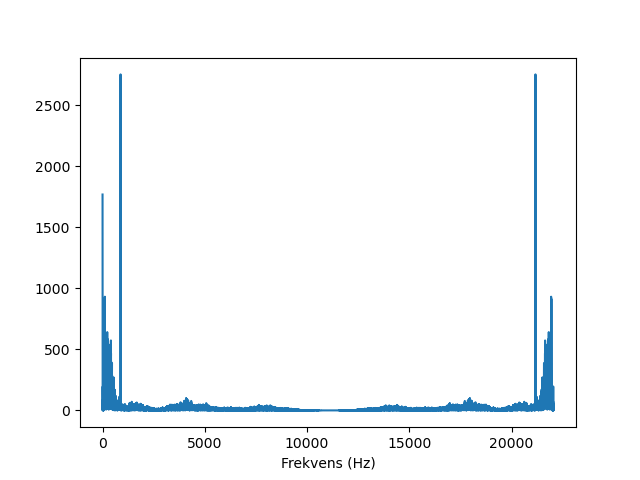

Text(0.5, 0, 'Frekvens (Hz)')

In [3]:
k = np.arange(len(xn))
Xk = fft(xn)
N = len(Xk)

peaks = np.where(np.absolute(Xk)==max(np.absolute(Xk)))
freq = peaks[0][0]/N*fs
print("Høyeste punkt i |X[k]| har følgende indeksverdi:", peaks[0][0])
print("Sinusbølgens frekvens er ca.", round(freq), "Hz")

plt.close(1)
plt.figure(1)
plt.plot(k/N*fs, np.absolute(Xk))
plt.xlabel("Frekvens (Hz)")

Vi ser en tydelig diskontinuerlig "spike" i DFT-sekvensen $X[k]$ i index $k=4391$. Vi kan finne frekvensen ved å på følgende måte:

$$f = \frac{\text{peak index}}{\text{number of samples in DFT}} \cdot f_s \approx 880Hz$$

## b)

**Bruk fouriertransformasjon til å fjerne pipetonen fra lydsignalet.**\
_Hint: dette vil være mest hensiktsmessig å utføre i frekvensdomenet. Dette skal være fullt mulig å gjennomføre med de prinsippene vi har gjennomgått i oppgave 2 og 3._

Den siste kodecellen i dette dokumentet vil skrive et digitalt signal `yn` til en lydfil med samplingsfrekvens `fs`. Vi skal nå utføre operasjoner på talesignalet i frekvensdomenet for å fjerne pipetonen, for så å konvertere den manipulerte DFT-sekvensen tilbake til tidsdomenet som et nytt signal `yn`. 

Bruk signalet `yn` videre til å generere en "reparert" lydfil, last den ned, og lytt til talesignalet for å verifisere at pipelyden er borte. Var det vellykket?

*P.S. Lydfilen kan lastes ned her: [speech_no_tone.wav](speech_no_tone.wav)*

In [4]:
Yk = Xk[:] # Kopier X[k] til en ny DFT-sekvens Y[k]
Yk[4391]=0 # Sett positiv frekvenskomponent for pipetonen lik 0
Yk[N-4391]=0 # Sett negativ frekvenskomponent for pipetonen lik 0
yn = ifft(Yk) # Konverter til et signal i tidsdomenet
yn = np.real(yn) # Konverter til en array med kun relle verdier

Når vi laster ned lydfilen merker vi tydelig at pipetonen ikke er til stede lengre.

In [5]:
data = np.int16(yn/max(abs(yn))*0x8000) # Convert and scale samples from float to 16 bit integer
wavfile.write("speech_no_tone.wav", fs, data) 